In [64]:
# load the modules

import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


In [56]:

n_components_array=([1,2,3,4,5,10,20,50,100,200,500])

def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)

# plot some of the numbers
def plot_numbers(train):
    figure(figsize(5,5))
    for digit_num in range(0,64):
        subplot(8,8,digit_num+1)
        grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
        #plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
        xticks([])
        yticks([])
    savefig('Numbers_plot.png', bbox_inches='tight')
    
def PCA_dist(train):
    pca = PCA(n_components=2)
    pca.fit(train)
    transform = pca.transform(train)

    figure(figsize(6,5))
    plt.scatter(transform[:,0],transform[:,1], s=20, c = target, cmap = "nipy_spectral", edgecolor = "None")
    plt.colorbar()
    clim(0,9)

    xlabel("PC1")
    ylabel("PC2")
    savefig('PCA_Distribution_for_2_components.png', bbox_inches='tight')
    
def var_ratio(n_components_array,train):
    vr = np.zeros(len(n_components_array))
    i=0;
    for n_components in n_components_array:
        pca = PCA(n_components=n_components)
        pca.fit(train)
        vr[i] = sum(pca.explained_variance_ratio_)
        i=i+1    
    figure(figsize(8,4))
    plot(n_components_array,vr,'k.-')
    xscale("log")
    ylim(9e-2,1.1)
    yticks(linspace(0.2,1.0,9))
    xlim(0.9)
    grid(which="both")
    xlabel("number of PCA components",size=20)
    ylabel("variance ratio",size=20)
    savefig('Variance_ratio.png', bbox_inches='tight')
    
def KNN_PCA_accuracy_curve(n_components_array,train):
    clf = KNeighborsClassifier()
    score_array = np.zeros(len(n_components_array))
    i=0
    for n_components in n_components_array:
        pca = PCA(n_components=n_components)
        pca.fit(train)
        transform = pca.transform(train.iloc[0:1000])
        score_array[i] = evaluate_classifier(clf, transform, target.iloc[0:1000], 0.8)
        i=i+1
    figure(figsize(8,4))
    plot(n_components_array,score_array,'k.-')
    xscale('log')
    xlabel("number of PCA components", size=20)
    ylabel("accuracy", size=20)
    grid(which="both")
    savefig('KNN_PCA_accuracy_curve.png', bbox_inches='tight')

In [45]:
# read in the data

data = pd.read_csv('training.csv')
train=data.iloc[0:int(len(data.index)*.80)]
test = data.iloc[int(len(data.index)*.80):int(len(data.index))]
target = train["label"]
test_target = test['label']
train = train.drop("label",1)
test = test.drop("label",1)

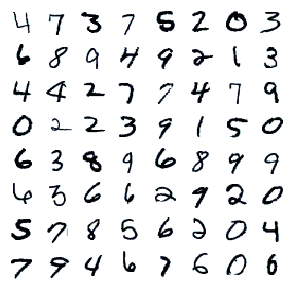

In [48]:
plot_numbers(train)

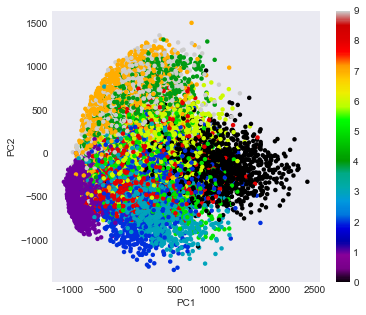

In [50]:
PCA_dist(train)

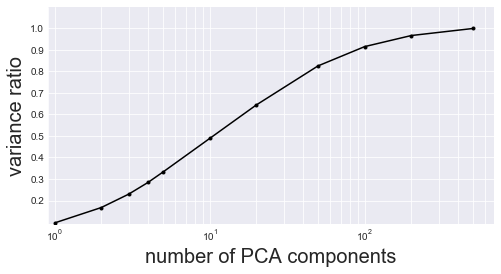

In [55]:
var_ratio(n_components_array,train)

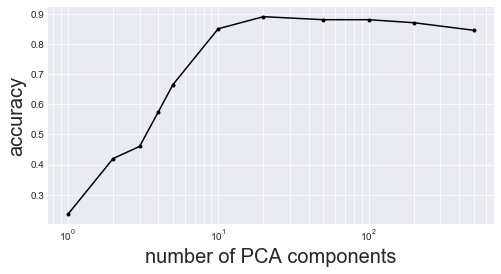

In [57]:
KNN_PCA_accuracy_curve(n_components_array,train)

In [62]:
# PCA + kNN
def KNN(data):   
    pca = PCA(n_components=50)
    pca.fit(train)
    target = data["label"]
    data  = data.drop("label",1)
    transform_data = pca.transform(data)
    clf = KNeighborsClassifier()
    scores = cross_val_score(clf, data, target, cv=5)
    print scores
    print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
#     clf.fit(transform_train, target)
#     results=clf.predict(transform_test)

In [65]:
KNN(data)

[0.95814507 0.9604856  0.95308407 0.95092901 0.95830355]
Accuracy: 0.96 (+/- 0.01)


In [44]:
print("Accuracy:",accuracy(np.array(test_target),results))

('Accuracy:', 0.9654761904761905)
